In [37]:
import pandas as pd
import geopandas as geopd
import os
import sys
import descartes
from shapely.geometry import Point, LineString
import matplotlib.pyplot as plt

In [4]:
sys.path.append("/home/charles/Projects/Plaques/Python")  #this is the important line!!!
os.chdir( "/home/charles/Projects/Plaques/Python/OsmnxStreets") 

In [5]:
from OsmnxStreets import *

In [8]:
dfStreetEdges=getDfStreetEdges()
dfStreetEdges.head()

index               Street   lngStart   latStart     lngEnd     latEnd
0      0  rue Wilfrid-Laurier -71.211626  46.808025 -71.222580  46.801753
1      1   rue de la Tourelle -71.228938  46.807552 -71.220098  46.812131
2      3    rue Saint-Gabriel -71.218576  46.810208 -71.222092  46.808695
3      4         rue Aberdeen -71.228321  46.801381 -71.225280  46.803173
4      5        rue Richelieu -71.228021  46.806901 -71.213253  46.813998

In [11]:
pointsStart=[Point(xy) for xy in zip(dfStreetEdges["lngStart"],dfStreetEdges["latStart"])]
pointsEnd=[Point(xy) for xy in zip(dfStreetEdges["lngEnd"],dfStreetEdges["latEnd"])]

In [28]:
#pointsStart[:2]

In [29]:
#LineString( [pointsStart[2], pointsEnd[2]])

In [30]:
#[ [se[0],se[1]] for se in zip(pointsStart, pointsEnd ) ] 

In [31]:
lineStrings=[LineString([se[0],se[1]]) for se in zip(pointsStart, pointsEnd ) ]

In [34]:
dfStreetEdgesLineStrings=geopd.GeoDataFrame(dfStreetEdges,
                  crs={'init':'epsg:4326'},
                  geometry=lineStrings)

In [35]:
dfStreetEdgesLineStrings.head(2)

index               Street   lngStart   latStart     lngEnd     latEnd  \
0      0  rue Wilfrid-Laurier -71.211626  46.808025 -71.222580  46.801753   
1      1   rue de la Tourelle -71.228938  46.807552 -71.220098  46.812131   

                                            geometry  
0  LINESTRING (-71.211626 46.808025, -71.22258000...  
1  LINESTRING (-71.228938 46.807552, -71.22009799...

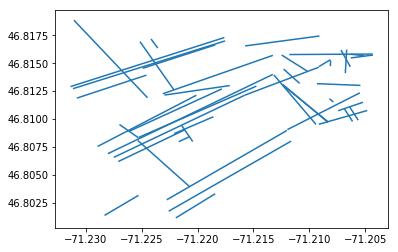

In [38]:
dfStreetEdgesLineStrings.plot()

In [40]:
dfNodes=getUniqueNodes(dfStreetEdges, 0)
dfNodes.head(3)

removed 1 duplicate rows:
    index                  Street   lngStart   latStart     lngEnd    latEnd  \
9     10  rue Saint-Jean vieuxqc -71.215778  46.812134 -71.209147  46.81464   

                                            geometry  
9  LINESTRING (-71.215778 46.812134, -71.209147 4...   
There are  89 unique nodes


index        lng        lat
0      0 -71.211626  46.808025
1      1 -71.228938  46.807552
2      2 -71.218576  46.810208

In [43]:
listNodes=[Point([x[0],x[1]]) for x in zip(dfNodes["lng"],dfNodes['lat'])]

In [45]:
dfNodesPoints=geopd.GeoDataFrame(dfNodes,
                  crs={'init':'epsg:4326'},
                  geometry=listNodes)
dfNodesPoints.head()

index        lng        lat                              geometry
0      0 -71.211626  46.808025          POINT (-71.211626 46.808025)
1      1 -71.228938  46.807552          POINT (-71.228938 46.807552)
2      2 -71.218576  46.810208          POINT (-71.218576 46.810208)
3      3 -71.228321  46.801381  POINT (-71.22832099999999 46.801381)
4      4 -71.228021  46.806901          POINT (-71.228021 46.806901)

In [ ]:
fig,ax=plt.subplots(figsize=(15,15))
dfStreetEdgesLineStrings.plot()